### Using a Neural Network to classify the MNIST digits dataset - both tensorflow and keras have been used

### TENSORFLOW 

In [36]:
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf

In [37]:
mnist = input_data.read_data_sets("MNIST-data/", one_hot=True )

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [38]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(10000, 784)
(10000, 10)


We got here 55k training and 10k testing examples with one hot encoded labels 

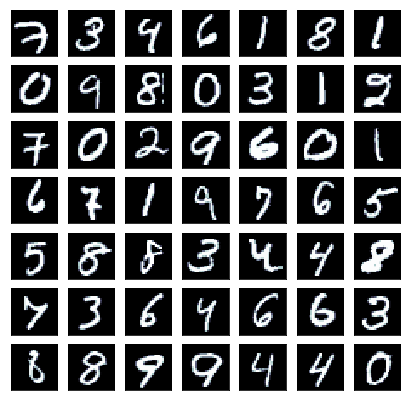

In [39]:
fig = plt.figure(figsize=(7,7))
for i in range(49):
    ax = fig.add_subplot(7,7,i+1, xticks=[], yticks=[])
    x = np.reshape(mnist.train.images[i], (28,28))
    ax.imshow(x, cmap=plt.cm.bone)
plt.show()

**We create a neural network consisting of an input layer having 784 nodes, 2 hidden layers of 256 nodes each and out layer consisting of 10 nodes **

In [50]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

# we use random normal distribution to initialise weights and biases
weights = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
# 1 bias for each node in next layer 
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [51]:
def mlp(x, weights, biases):
    layer1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer1 = tf.nn.relu(layer1)
    
    layer2 = tf.add(tf.matmul(layer1, weights['w2']), biases['b2'])
    layer2 = tf.nn.relu(layer2)
    
    out_layer = tf.add(tf.matmul(layer2, weights['out']), biases['out'])
    return out_layer

In [52]:
x = tf.placeholder("float", [None,n_input])
y = tf.placeholder("float", [None,n_classes])
pred = mlp(x ,weights ,biases)
pred

<tf.Tensor 'Add_8:0' shape=(?, 10) dtype=float32>

In [91]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimize = tf.train.AdamOptimizer(learning_rate=0.008).minimize(cost)

In [92]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [93]:
# we run the optimizer 30 times over the entire dataset (which is covered in batches of 100)
batch_size = 100
for i in range(30):
    num_batches = int(mnist.train.num_examples/batch_size)
    tot_cost = 0
    for i in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _ , c = sess.run([optimize, cost], feed_dict = {x:batch_x, y:batch_y})
        tot_cost += c
    print(tot_cost)

24989.89687347412
5875.578890470486
2890.249250646585
1931.002791478194
1499.7119323711381
1191.4062168692335
1247.182403443331
1059.557376096291
1018.1727292082923
809.2932895099946
779.8948279720634
700.0634867802441
707.3462263787417
623.9031913208802
582.7861849052898
481.95565201334296
511.7971853549471
408.5187886718321
467.11918230895594
441.7651627949381
341.10796060996904
405.6846192303221
353.30658836002675
340.2614458753481
310.72321135602084
316.55794950202574
303.2201118882351
255.94196533453092
394.6964624365871
268.0147831752035


In [94]:
# the pred matrix is one-hot-encoded
# the argmax function returns the index with the largest value(which is the only value=1 in each row)
# this index is also the class label or digit for the example
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions, correct_predictions = sess.run([predictions, correct_predictions], 
                                            feed_dict={x:mnist.test.images, y:mnist.test.labels})

In [95]:
num_correct = (correct_predictions == False).sum()
print("{} out of 10000 are wrong".format(num_correct))

265 out of 10000 are wrong


In [96]:
accuracy = 1 - num_correct/len(correct_predictions)
print(accuracy)

0.9735


### KERAS

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [81]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10))

In [82]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

In [83]:
model.fit(mnist.train.images, mnist.train.labels, batch_size=50, epochs=15)

Epoch 1/15
55000/55000 [==============================] - 4s 74us/step - loss: 0.0152 - acc: 0.9405
Epoch 2/15
55000/55000 [==============================] - 3s 60us/step - loss: 0.0062 - acc: 0.9766
Epoch 3/15
55000/55000 [==============================] - 4s 65us/step - loss: 0.0042 - acc: 0.9842
Epoch 4/15
55000/55000 [==============================] - 3s 64us/step - loss: 0.0032 - acc: 0.9880
Epoch 5/15
55000/55000 [==============================] - 6s 108us/step - loss: 0.0025 - acc: 0.9904
Epoch 6/15
55000/55000 [==============================] - 8s 141us/step - loss: 0.0020 - acc: 0.9935
Epoch 7/15
55000/55000 [==============================] - 5s 89us/step - loss: 0.0016 - acc: 0.9947
Epoch 8/15
55000/55000 [==============================] - 6s 105us/step - loss: 0.0014 - acc: 0.9955
Epoch 9/15
55000/55000 [==============================] - 8s 141us/step - loss: 0.0011 - acc: 0.9965
Epoch 10/15
55000/55000 [==============================] - 6s 101us/step - loss: 0.0010 - acc: 0

In [84]:
score = model.evaluate(mnist.test.images, mnist.test.labels)
score

10000/10000 [==============================] - 0s 36us/step


[0.0035916924284538254, 0.9787]